# Selamat datang dalam Ujian Deep Learning Image

Tugas kalian adalah untuk melakukan analisis dasar untuk membangun Deep Learning di Image Proccessing. Adapun  data set yang digunakan adalah Fashion MNIST. 


Aturan ujian:
1. **Boleh melihat catatan dan internet**
2. **Penamaan file:**:
     
     - Nama File dirubah menjadi #Nama#Waktu#-Ujian-Deep-Learning.ipynb menjadi:
         - Andreas-24Feb2019-Deep-Learning.ipynp
         
3. Ujian Dilakukan pada hari ini dan diselesaikan dalam waktu 1.5 jam

Adapun komponen penilaian pada ujian ini adalah:


1. **Data pre-processing**  
     1.1. Memuat Data  
     1.2. Memeriksa Bentuk dan Tipe Data  
     1.3. Ekstraksi x_train dan y_train  
     1.4. Visualisasi  
     1.5. Normalisasi  
     1.6. Menyesuaikan Shape dari Dataset  
     1.7. One-Hot Encoding  
     1.8. Memisahkan Data Training dan Data Validation      
      
2. **Convolutional Neural Network**  
    

3. **Analisis Hasil**  .Melakukan Visualisasi / Plotting Loss dan Accuracy  
    

<hr>

# 1. Data Preprocessing

-- silahkan tuliskan analisa kalian 


import library sesuai requirement pada saat ingin melakukan data preprocessing

In [87]:
##kode kalian
import numpy as np
import pandas as pd

## 1.1 Memuat Data
-- silahkan tuliskan analisa kalian

untuk kebutuhan membuat model yang baik, dibutuhkan data train dan data test.
dataset yang akan digunakan adalah file csv, pastikan location pathnya sudah tepat untuk masing-masing dataset.
lalu setelah itu baca masing-masing dataset tersebut dan simpan di dalam variabel.


In [88]:
## kode kalian
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

## 1.2 Memeriksa Bentuk dan Tipe Data
-- silahkan tuliskan analisa kalian

setelah dataset tadi dimasukkan ke dalam variabel, ada baiknya dicheck terlebih dahulu untuk memastikan bahwa data sudah tersimpan di dalam variabel.
supaya kita tahu properti (tipe, bentuk, dan isi) dari dataset yang kita akan gunakan, sehingga kita tahu cara untuk menggunakan data tersebut.

### Memeriksa Tipe Data

In [89]:
# memeriksa tipe data
print('Tipe data variable train :', type(train))
print('Tipe data variable test  :', type(test))

Tipe data variable train : <class 'pandas.core.frame.DataFrame'>
Tipe data variable test  : <class 'pandas.core.frame.DataFrame'>


### Memeriksa Bentuk Data

In [90]:
# memeriksa bentuk data
print('Shape dari variable train : ', train.shape)
print('Shape dari variable test  : ', test.shape)

# memeriksa jumlah data
num_train = len(train.values) 
num_test = len(test.values) 
print('\nJumlah training data : ', num_train, 'pasang gambar dan class/label')
print('Jumlah test data     : ', num_test, 'pasang gambar dan class/label')

Shape dari variable train :  (60000, 785)
Shape dari variable test  :  (10000, 785)

Jumlah training data :  60000 pasang gambar dan class/label
Jumlah test data     :  10000 pasang gambar dan class/label


### Memeriksa Isi Data

In [91]:
# kode kalian
train.head(10)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   
5      4       0       0       0       5       4       5       5       3   
6      4       0       0       0       0       0       0       0       0   
7      5       0       0       0       0       0       0       0       0   
8      4       0       0       0       0       0       0       3       2   
9      8       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   
5       5  ...         7         8         7         4         3         7   
6       0  ...        14         0         0         0         0         0   
7       0  ...         0         0         0         0         0         0   
8       0  ...         1         0         0         0         0         0   
9       0  ...       203       214       166         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  
5         5         0         0         0  
6         0         0         0         0  
7         0         0         0         0  
8         0         0         0         0  
9         0         0         0         0  

[10 rows x 785 columns]

In [92]:
test.head(10)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   
5      2       0       0       0       0       0      44     105      44   
6      8       0       0       0       0       0       0       0       0   
7      6       0       0       0       0       0       0       0       1   
8      5       0       0       0       0       0       0       0       0   
9      0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   
5      10  ...       105        64        30         0         0         0   
6       0  ...         0         0         0         0         0         0   
7       0  ...       174       136       155        31         0         1   
8       0  ...         0         0         0         0         0         0   
9       0  ...        57        70        28         0         2         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  
5         0         0         0         0  
6         0         0         0         0  
7         0         0         0         0  
8         0         0         0         0  
9         0         0         0         0  

[10 rows x 785 columns]

## 1.3 Ekstraksi x_train dan y_train
-- silahkan tuliskan analisa kalian

memisahkan data dan class dari dataset train

<b>y_train</b> mengambil data train dari kolom label.
setelah itu kolom label yang ada pada data train dihapuskan, lalu nilai yang ada di data train tersebut ditampung ke dalam variabel <b>x_train</b>

In [93]:
## kode kalian
y_train = train["label"]
print("Shape dari variable y_train: ", y_train.shape)

x_train = train.drop("label", axis=1)
print("Shape dari variable x_train: ", x_train.shape)

Shape dari variable y_train:  (60000,)
Shape dari variable x_train:  (60000, 784)


## 1.4 Visualisasi
-- silahkan tuliskan analisa kalian.

memvisualisasikan dataset dengan cara plotting.

untuk melakukan visualisasi, kita harus memiliki dimensi untuk image yang akan dibentuk.
lakukan perhitungan dimensi terlebih dahulu

import library sesuai requirement pada saat ingin melakukan visualisasi data

In [94]:
from math import sqrt

In [95]:
jumlah_pixel = x_train.shape[1]
dim = int(sqrt(jumlah_pixel))
print("Dimensi gambar: {}x{}.".format(dim, dim))

Dimensi gambar: 28x28.


In [96]:
import matplotlib.pyplot as pl
import matplotlib.image as plimg

### Visualisasi Satu Gambar

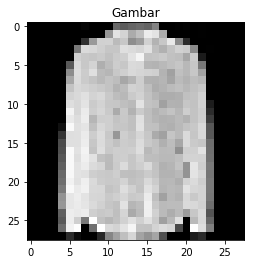

In [97]:
#kode kalian
%matplotlib inline

x_train_img = x_train.values.reshape(num_train, dim, dim)
pl.imshow(x_train_img[2], cmap=pl.get_cmap('gray'))
pl.title("Gambar")
pl.show()  

## 1.5 Normalisasi
-- silahkan tuliskan analisa kalian

Untuk mempersingkat time cost dalam proses converge maka dilakukan nilai normalisasi untuk mendapatkan nilai rentang 0-1

Saya membuat 1 function untuk melakukan proses normalisasi yaitu di dalamnya hanya melakukan pembagian value pixelnya dibagi dengan max pixel yaitu 255

In [98]:
def normalize(x):
    return x / 255.0

In [99]:
# kode kalian
norm_x_train = normalize(x_train)

#check data train setelah dinormalisasikan
norm_x_train.head(10)

pixel1  pixel2  pixel3    pixel4    pixel5    pixel6    pixel7    pixel8  \
0     0.0     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.0     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.0     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.019608   
3     0.0     0.0     0.0  0.003922  0.007843  0.000000  0.000000  0.000000   
4     0.0     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
5     0.0     0.0     0.0  0.019608  0.015686  0.019608  0.019608  0.011765   
6     0.0     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
7     0.0     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
8     0.0     0.0     0.0  0.000000  0.000000  0.000000  0.011765  0.007843   
9     0.0     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

     pixel9   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.117647  0.168627   
3  0.000000  0.000000  ...  0.011765  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.019608  0.023529  ...  0.027451  0.031373  0.027451  0.015686  0.011765   
6  0.000000  0.000000  ...  0.054902  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000  ...  0.003922  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.000000  ...  0.796078  0.839216  0.650980  0.000000  0.000000   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0  0.000000  0.000000       0.0       0.0       0.0  
1  0.000000  0.000000       0.0       0.0       0.0  
2  0.000000  0.000000       0.0       0.0       0.0  
3  0.003922  0.000000       0.0       0.0       0.0  
4  0.000000  0.000000       0.0       0.0       0.0  
5  0.027451  0.019608       0.0       0.0       0.0  
6  0.000000  0.000000       0.0       0.0       0.0  
7  0.000000  0.000000       0.0       0.0       0.0  
8  0.000000  0.000000       0.0       0.0       0.0  
9  0.000000  0.000000       0.0       0.0       0.0  

[10 rows x 784 columns]

## 1.6 Menyesuaikan Shape dari Dataset
-- silahkan tuliskan analisa kalian

Setelah dataset train dinormalisasi, selanjutnya adalah melakukan reshape ke dalam bentuk 3D matrix sesuai dengan dimensi dari gambarnya

In [100]:
## kode kalian
xtrain = norm_x_train.values.reshape(num_train, dim, dim, 1)
print("Shape xtrain sebelum, pixel berbentuk vektor 1D:", norm_x_train.shape)
print("Shape xtrain sesudah, pixel berbentuk 28x28x1 3D matrix:", xtrain.shape)

Shape xtrain sebelum, pixel berbentuk vektor 1D: (60000, 784)
Shape xtrain sesudah, pixel berbentuk 28x28x1 3D matrix: (60000, 28, 28, 1)


## 1.7 One-Hot Encoding
-- silahkan tuliskan analisa kalian

mengkategorisasikan label yang ada di dalam data train (<b>y_train</b>)


In [101]:
## kode kalian
from keras.utils.np_utils import to_categorical

In [102]:
max_y = y_train.max()
min_y = y_train.min()
nclasses = max_y - min_y + 1
print("Tipe data ytrain sebelum : ", type(y_train))
print("Shape ytrain sebelum     : ", y_train.shape)
ytrain = to_categorical(y_train, num_classes = nclasses)
print("\nTipe data ytrain sesudah : ", type(ytrain))
print("Shape ytrain sesudah     : ", ytrain.shape)

print('Label encoding:')
print(y_train.values)

print('\nOne-hot encoding:')
print(ytrain)

Tipe data ytrain sebelum :  <class 'pandas.core.series.Series'>
Shape ytrain sebelum     :  (60000,)

Tipe data ytrain sesudah :  <class 'numpy.ndarray'>
Shape ytrain sesudah     :  (60000, 10)
Label encoding:
[2 9 6 ... 8 8 7]

One-hot encoding:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


## 1.8 Memisahkan Data Training dan Data Validation
-- silahkan tuliskan analisa kalian

Memisahkan data train yang ada untuk melakukan validasi supaya kita mengetahui apakah model yang kita buat mengalamai overfitting atau tidak. 


In [103]:
## kode kalian
from sklearn.model_selection import train_test_split

In [104]:
seed = 2
np.random.seed(seed)
sample = 0.1

xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain,     
                                              test_size=sample,       
                                              random_state=seed,   
                                              shuffle=True,
                                             )

print('Bentuk xtrain sekarang : ', xtrain.shape)
print('Bentuk ytrain sekarang : ', ytrain.shape)
print('\nBentuk xval sekarang   : ', xval.shape)
print('Bentuk yval sekarang   : ', yval.shape)

Bentuk xtrain sekarang :  (54000, 28, 28, 1)
Bentuk ytrain sekarang :  (54000, 10)

Bentuk xval sekarang   :  (6000, 28, 28, 1)
Bentuk yval sekarang   :  (6000, 10)


<hr>

# 2. Convolutional Neural Network

Pada bagian ini Convolutional Neural Network akan dibangun; termasuk membangun arsitekturnya, menentukan optimizer, pengukuran kinerja, learning rate, dll.

In [105]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [51]:
## kode kalian
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))     
model.add(Dense(nclasses, activation='softmax'))

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
__________

In [54]:
model.compile(optimizer="adam",                 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])   

In [55]:
history = model.fit(
    xtrain, ytrain, 
    batch_size=512,
    epochs=5,
    verbose=1,
    validation_data=(xval, yval),
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 124s 2ms/step - loss: 0.7578 - acc: 0.7227 - val_loss: 0.4766 - val_acc: 0.8257
Epoch 2/5
54000/54000 [==============================] - 122s 2ms/step - loss: 0.4429 - acc: 0.8374 - val_loss: 0.3799 - val_acc: 0.8647
Epoch 3/5
54000/54000 [==============================] - 121s 2ms/step - loss: 0.3764 - acc: 0.8643 - val_loss: 0.3458 - val_acc: 0.8740
Epoch 4/5
54000/54000 [==============================] - 123s 2ms/step - loss: 0.3463 - acc: 0.8753 - val_loss: 0.3232 - val_acc: 0.8838
Epoch 5/5
54000/54000 [==============================] - 126s 2ms/step - loss: 0.3221 - acc: 0.8835 - val_loss: 0.2996 - val_acc: 0.8922


<hr>

# 3. Analisis Hasil
##  Melakukan Visualisasi / Plotting Loss dan Accuracy

-- silahkan tuliskan analisa kalian

setelah melakukan compiling pada model yang sudah dibuat, lalu setelah itu kita lakukan visualisasi dari hasil ploting sehingga terlihat rentang loss & accuracy dari model yang sudah dibuat tadi.

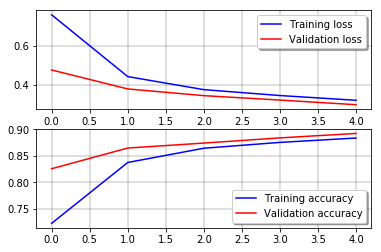

In [57]:
#plot perbandingan training loss dan validation loss
fig, ax = pl.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

#plot perbandingan training acc dan validation acc
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

berdasarkan visualisasi hasil dari model di atas ini, maka dapat dilihat bahwa model tidak mengalami overfitting

# Kesan dan Pesan untuk Kursus ini

silahkan tuliskan kesan dan pesan kalian


**Kesan**
Kursus deep learning ini memberikan saya perspective yang baru dalam melihat data. Banyak sekali ilmu yang saya dapatkan dalam kursus ini yang sebelumnya saya tidak pernah mendapatkan gambaran yang cukup jelas mengenai deep learning. pengajarnya sangat baik sekali dalam menyampaikan serta memberikan gambaran/ contoh di setiap materinya. hanya saja mungkin waktunya terlalu singkat sehingga masih banyak gap knowledge yang belum tercerahkan.
